In [2]:
import sklearn
import pandas as pd
#from fbprophet import Prophet

(Season 6 processing using the template from Season 4)

In [3]:
#cdf = pd.read_csv('/Volumes/Curt-MacPro-Backup/D3M/terra/processing/V2/s4_height_s1.csv')
cdf = pd.read_csv('/media/clisle/Backup Plus/terra/processing/V2/s6_height_s1.csv')


In [4]:
train_df = cdf[['genotype_id','day_number','range','column']]
target_df = cdf['height(cm)']

In [5]:
X_train = train_df.values
y_train = target_df.values
print(X_train.shape)
print(y_train.shape)

(43986, 4)
(43986,)


In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor

tree = DecisionTreeRegressor(max_depth=4).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
#svm_mod = svm.SVR().fit(X_train, y_train)
gbr_mod = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)

pred_tree = tree.predict(X_train)
pred_lr = linear_reg.predict(X_train)
#pred_svm = svm_mod.predict(X_train)
pred_gbr = gbr_mod.predict(X_train)


In [7]:
cdf['decision_tree'] = pred_tree
cdf['linearRegression'] = pred_lr
#cdf['svm'] = pred_svm
cdf['gboost'] = pred_gbr
cdf.head()

,Unnamed: 0,day_number,range,column,sensor,height(cm),genotype_id,genotype_string,decision_tree,linearRegression,gboost
0,0,115,3,2,1,4.40,350,SP1516,5.601624,-66.971771,0.2224
1,2,116,3,2,1,5.56,350,SP1516,5.601624,-63.437410,0.2224
2,4,119,3,2,1,5.66,350,SP1516,5.601624,-52.834330,0.2224
3,6,123,3,2,1,5.71,350,SP1516,5.601624,-38.696889,0.2224
4,8,124,3,2,1,5.55,350,SP1516,5.601624,-35.162529,0.2224


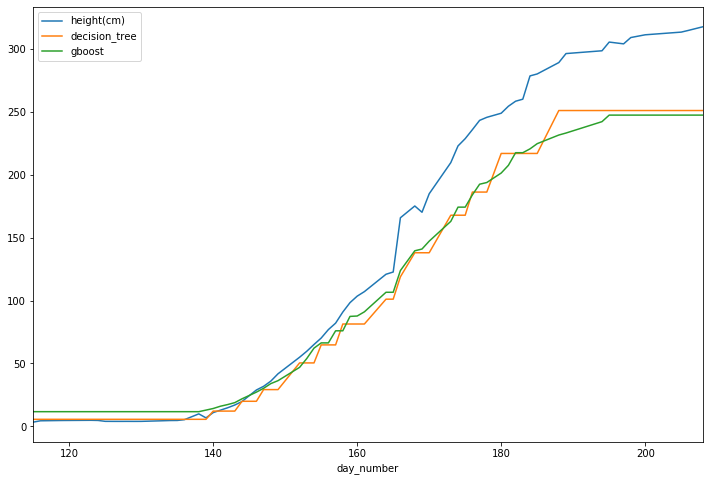

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

def plot_cultivar(fulldf,cultivar):
    df = fulldf.loc[fulldf['genotype_id'] == cultivar]
    minCol = df['column'].min()
    df = df.loc[df['column']==minCol]
    #print(df.shape)
    df = df[['day_number','height(cm)','decision_tree','gboost']]
    df = df.set_index('day_number')
    df.plot()

#plot_cultivar(cdf,'PI145619')
plot_cultivar(cdf,5)

In [10]:
#note, try StandardScalar on the training data

Now try training a MLP on the dataset to see if this can better fit the data

In [11]:
from keras import models
from keras import layers

Using TensorFlow backend.
/home/clisle/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/clisle/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/clisle/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/clisle/anacond

In [12]:

def build_model(train_data):

    # start with an empty model
    model = models.Sequential()
    
    # add a first layer with 64 neurons/outputs
    model.add(layers.Dense(32, activation='relu',
                           input_shape=(train_data.shape[1],)))
    
    # add a second layer, also with 64 nodes/outputs
    model.add(layers.Dense(8, activation='relu'))
    
    # add a final layer without any activation function!  
    # Just let the floating point value come out directly without being adjusted
    model.add(layers.Dense(1))
    
    # standard compile options for a regression problem
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    # return the model so it can be trained
    return model

In [13]:
model = build_model(X_train)
print('training model')
model.fit(X_train,y_train,epochs=10, batch_size=1, verbose=2)
print('evaluating model fit:')
val_mse, val_mae = model.evaluate(X_train, y_train, verbose=0)
print(val_mse,val_mae)





training model


Epoch 1/10
 - 137s - loss: 4836.5159 - mean_absolute_error: 58.0054
Epoch 2/10
 - 136s - loss: 2445.5733 - mean_absolute_error: 39.2302
Epoch 3/10
 - 137s - loss: 1512.8596 - mean_absolute_error: 29.8928
Epoch 4/10
 - 137s - loss: 1320.2260 - mean_absolute_error: 27.3564
Epoch 5/10
 - 137s - loss: 1189.4843 - mean_absolute_error: 25.4796
Epoch 6/10
 - 137s - loss: 1098.4593 - mean_absolute_error: 24.0924
Epoch 7/10
 - 137s - loss: 1037.0772 - mean_absolute_error: 23.1470
Epoch 8/10
 - 137s - loss: 1022.8773 - mean_absolute_error: 22.8806
Epoch 9/10
 - 137s - loss: 970.4084 - mean_absolute_error: 22.0547
Epoch 10/10
 - 137s - loss: 925.5328 - mean_absolute_error: 21.3320
evaluating model fit:
1173.101874607211 23.180331265764295


In [14]:
# add the MLP predictions as another column in the dataframe
cdf['mlp'] = model.predict(X_train)

In [15]:
cdf.head()

,Unnamed: 0,day_number,range,column,sensor,height(cm),genotype_id,genotype_string,decision_tree,linearRegression,gboost,mlp
0,0,115,3,2,1,4.40,350,SP1516,5.601624,-66.971771,0.2224,-0.775080
1,2,116,3,2,1,5.56,350,SP1516,5.601624,-63.437410,0.2224,-0.173761
2,4,119,3,2,1,5.66,350,SP1516,5.601624,-52.834330,0.2224,1.630217
3,6,123,3,2,1,5.71,350,SP1516,5.601624,-38.696889,0.2224,3.792784
4,8,124,3,2,1,5.55,350,SP1516,5.601624,-35.162529,0.2224,4.283831


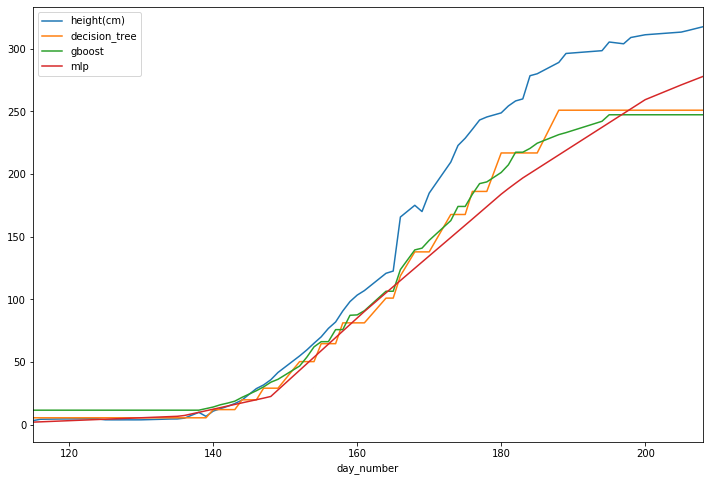

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

def plot_cultivar(fulldf,cultivar):
    df = fulldf.loc[fulldf['genotype_id'] == cultivar]
    minCol = df['column'].min()
    df = df.loc[df['column']==minCol]
    #print(df.shape)
    df = df[['day_number','height(cm)','decision_tree','gboost','mlp']]
    df = df.set_index('day_number')
    df.plot()

#plot_cultivar(cdf,'PI145619')
plot_cultivar(cdf,5)

In [17]:
cdf.to_csv("/media/clisle/Backup Plus/terra/processing/V2/s6_with_predictions.csv")